In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)




In [2]:
# !unzip DevanagariHandwrittenCharacterDataset.zip
# %ls

Streaming output truncated to the last 5000 lines.
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/104099.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/104101.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12716.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12723.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12724.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12725.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12726.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12727.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12731.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12732.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12735.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/13584.png  
 extracting: Devanagari

In [6]:
from __future__ import print_function
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import ELU
import os


In [7]:
num_classes = 21
img_rows, img_cols = 64, 64
batch_size = 256


train_data_dir = '/content/DevanagariHandwrittenCharacterDataset/Train'
validation_data_dir = '/content/DevanagariHandwrittenCharacterDataset/Test'


trainDataGen = ImageDataGenerator(
		rotation_range = 8,
		width_shift_range = 0.1,
		height_shift_range = 0.1,
		rescale = 1.0/255,
		shear_range = 0.2,
		zoom_range = 0.2,
		horizontal_flip = False,
		fill_mode = 'nearest',
)

test_datagen = ImageDataGenerator(rescale=1./255)
trainGenerator = trainDataGen.flow_from_directory(
			train_data_dir,
			target_size = (64,64),
			batch_size = 256,
			color_mode = "grayscale",
			class_mode = "categorical",
shuffle=True)
validation_generator = test_datagen.flow_from_directory(
			validation_data_dir,
			target_size=(64,64),
			batch_size=256,
			color_mode = "grayscale",
			class_mode= 'categorical',
shuffle=True)


Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


In [8]:
model = Sequential()

# First CONV-ReLU Layer
model.add(Conv2D(64, (3, 3), padding = 'same', input_shape = (img_rows, img_cols,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Second CONV-ReLU Layer
model.add(Conv2D(64, (3, 3), padding = "same", input_shape = (img_rows, img_cols,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Max Pooling with Dropout
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 3rd set of CONV-ReLU Layers
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# 4th Set of CONV-ReLU Layers
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Max Pooling with Dropout
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 5th Set of CONV-ReLU Layers
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# 6th Set of CONV-ReLU Layers
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Max Pooling with Dropout
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# First set of FC or Dense Layers
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Second set of FC or Dense Layers
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Final Dense Layer
model.add(Dense(num_classes))
model.add(Activation("softmax"))

print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 5,415,637 (20.66 MB)

 Trainable params: 5,412,821 (20.65 MB)

 Non-trainable params: 2,816 (11.00 KB)

None


In [12]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers import ELU

num_classes = 46  # Updated number of classes
img_rows, img_cols = 64, 64
batch_size = 256
nb_train_samples = 78200
nb_validation_samples = 13800
epochs = 25

# Update model architecture
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(img_rows, img_cols, 1)))
model.add(ELU(alpha=1.0))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(ELU(alpha=1.0))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(ELU(alpha=1.0))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(ELU(alpha=1.0))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(ELU(alpha=1.0))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(ELU(alpha=1.0))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512))
model.add(ELU(alpha=1.0))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(ELU(alpha=1.0))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes))  # Updated number of classes
model.add(Activation("softmax"))

# Model checkpoint and learning rate reduction
checkpoint = ModelCheckpoint("./my_model.keras",
                             monitor="accuracy",
                             mode="max",
                             save_best_only=True,
                             verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='accuracy',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.00001)

callbacks = [checkpoint, reduce_lr]

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.01),
              metrics=['accuracy'])

# Train the model
history = model.fit(
    trainGenerator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.4894 - loss: 2.1213
Epoch 1: accuracy improved from -inf to 0.68973, saving model to ./my_model.keras
305/305 ━━━━━━━━━━━━━━━━━━━━ 141s 359ms/step - accuracy: 0.4901 - loss: 2.1181 - val_accuracy: 0.1742 - val_loss: 7.7795 - learning_rate: 0.0100
Epoch 2/25
  1/305 ━━━━━━━━━━━━━━━━━━━━ 59s 196ms/step - accuracy: 0.8906 - loss: 0.4050

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: accuracy improved from 0.68973 to 0.89062, saving model to ./my_model.keras
305/305 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.8906 - loss: 0.4050 - val_accuracy: 0.1379 - val_loss: 8.7679 - learning_rate: 0.0100
Epoch 3/25
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.8949 - loss: 0.3429
Epoch 3: accuracy improved from 0.89062 to 0.90729, saving model to ./my_model.keras
305/305 ━━━━━━━━━━━━━━━━━━━━ 92s 297ms/step - accuracy: 0.8949 - loss: 0.3428 - val_accuracy: 0.9347 - val_loss: 0.2079 - learning_rate: 0.0100
Epoch 4/25
  1/305 ━━━━━━━━━━━━━━━━━━━━ 58s 192ms/step - accuracy: 0.9375 - loss: 0.1885
Epoch 4: accuracy improved from 0.90729 to 0.93750, saving model to ./my_model.keras
305/305 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9375 - loss: 0.1885 - val_accuracy: 0.9440 - val_loss: 0.2325 - learning_rate: 0.0100
Epoch 5/25
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.9304 - loss: 0.2213
Epoch 5: accuracy did not improve from 0.93750
305/3

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss= history.history['val_loss']


In [14]:
trainGenerator.class_indices

{'character_10_yna': 0,
 'character_11_taamatar': 1,
 'character_12_thaa': 2,
 'character_13_daa': 3,
 'character_14_dhaa': 4,
 'character_15_adna': 5,
 'character_16_tabala': 6,
 'character_17_tha': 7,
 'character_18_da': 8,
 'character_19_dha': 9,
 'character_1_ka': 10,
 'character_20_na': 11,
 'character_21_pa': 12,
 'character_22_pha': 13,
 'character_23_ba': 14,
 'character_24_bha': 15,
 'character_25_ma': 16,
 'character_26_yaw': 17,
 'character_27_ra': 18,
 'character_28_la': 19,
 'character_29_waw': 20,
 'character_2_kha': 21,
 'character_30_motosaw': 22,
 'character_31_petchiryakha': 23,
 'character_32_patalosaw': 24,
 'character_33_ha': 25,
 'character_34_chhya': 26,
 'character_35_tra': 27,
 'character_36_gya': 28,
 'character_3_ga': 29,
 'character_4_gha': 30,
 'character_5_kna': 31,
 'character_6_cha': 32,
 'character_7_chha': 33,
 'character_8_ja': 34,
 'character_9_jha': 35,
 'digit_0': 36,
 'digit_1': 37,
 'digit_2': 38,
 'digit_3': 39,
 'digit_4': 40,
 'digit_5': 41,
 

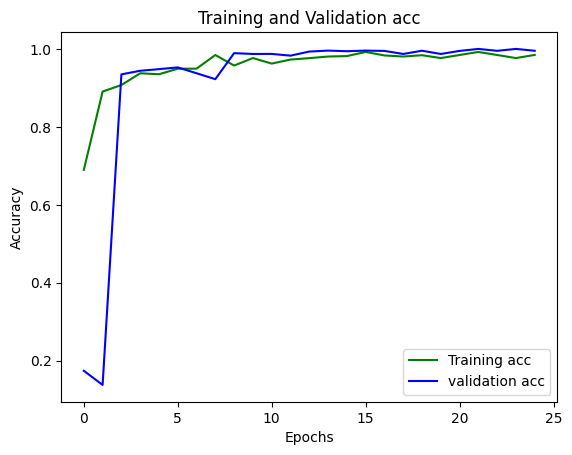

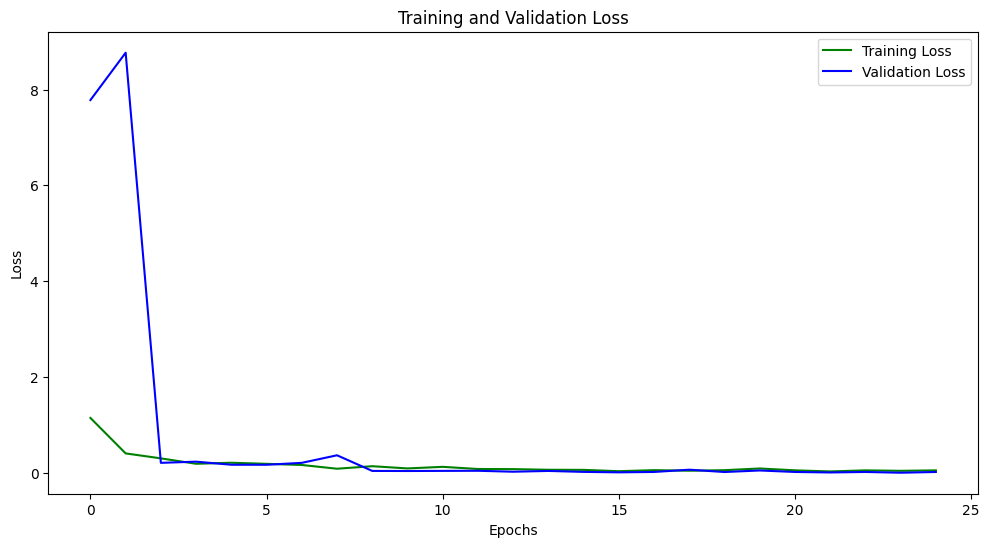

In [22]:
import matplotlib.pyplot as plt
epochs = range(0,25)
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

import matplotlib.pyplot as plt

# Number of epochs
epochs_range = range(len(history.history['loss']))  # Get number of epochs dynamically from history

# Plot training and validation loss
plt.figure(figsize=(12, 6))

# Training loss
plt.plot(epochs_range, history.history['loss'], 'g', label='Training Loss')

# Validation loss
plt.plot(epochs_range, history.history['val_loss'], 'b', label='Validation Loss')

# Add titles and labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Add a legend
plt.legend()

# Show plot
plt.show()


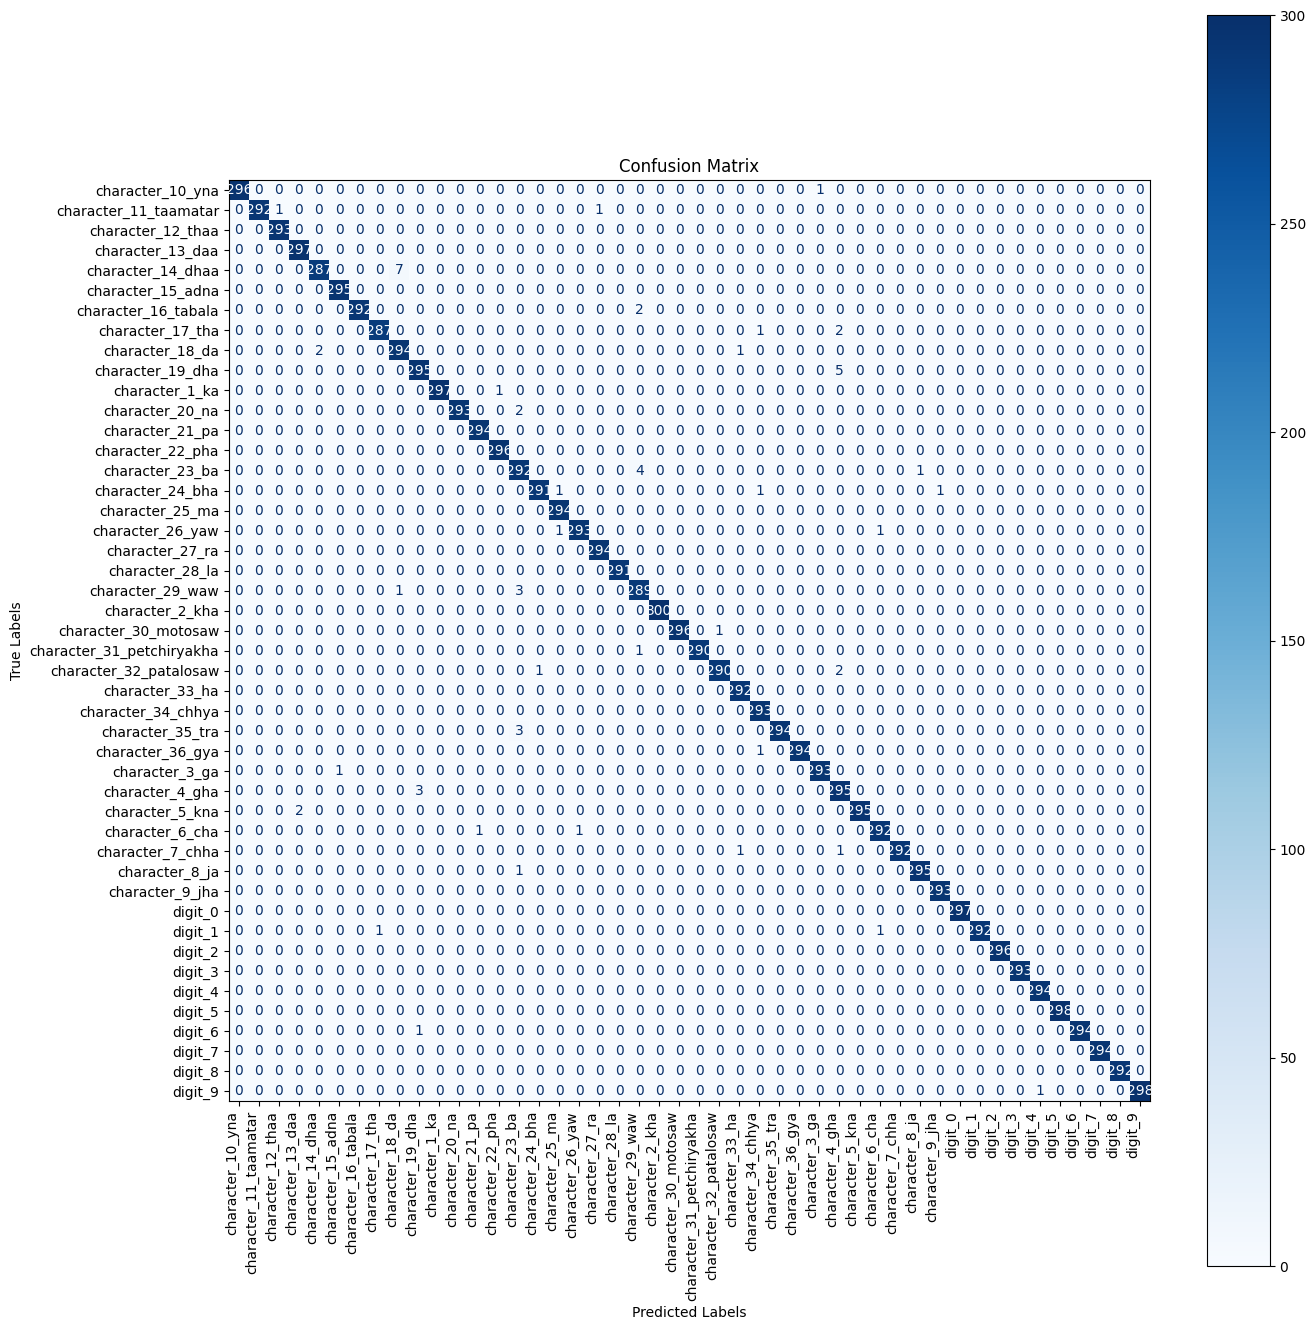

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Collect all true labels and predictions
true_classes = []
predicted_classes = []

# Iterate through the validation generator
for i in range(nb_validation_samples // batch_size):
    # Get a batch of data
    x_batch, y_batch = next(validation_generator)  # Use next()

    # Make predictions
    y_pred_batch = model.predict(x_batch, verbose=0)

    # Get predicted class indices
    y_pred_classes_batch = np.argmax(y_pred_batch, axis=1)

    # Append results
    true_classes.extend(np.argmax(y_batch, axis=1))
    predicted_classes.extend(y_pred_classes_batch)

# Convert lists to numpy arrays
true_classes = np.array(true_classes)
predicted_classes = np.array(predicted_classes)

# Ensure lengths are consistent
assert len(true_classes) == len(predicted_classes), "Mismatch in lengths of true and predicted classes"

# Get class labels
class_labels = list(validation_generator.class_indices.keys())

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes, labels=range(num_classes))

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(14, 14))  # Increase figure size for better visibility
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot confusion matrix with adjusted parameters
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d', colorbar=True)

# Improve the readability of labels
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)                # Rotate y-axis labels if necessary
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.tight_layout()  # Adjust layout to make sure everything fits without overlapping
plt.show()


In [19]:
from sklearn.metrics import f1_score, classification_report
import numpy as np

# Collect all true labels and predictions
true_classes = []
predicted_classes = []

# Iterate through the validation generator
for i in range(nb_validation_samples // batch_size):
    # Get a batch of data
    x_batch, y_batch = next(validation_generator)  # Use next() instead of .next()

    # Make predictions
    y_pred_batch = model.predict(x_batch, verbose=0)

    # Get predicted class indices
    y_pred_classes_batch = np.argmax(y_pred_batch, axis=1)

    # Append results
    true_classes.extend(np.argmax(y_batch, axis=1))
    predicted_classes.extend(y_pred_classes_batch)

# Convert lists to numpy arrays
true_classes = np.array(true_classes)
predicted_classes = np.array(predicted_classes)

# Ensure lengths are consistent
assert len(true_classes) == len(predicted_classes), "Mismatch in lengths of true and predicted classes"

# Compute F1 score
f1 = f1_score(true_classes, predicted_classes, average='weighted', labels=range(num_classes))

# Print F1 score
print(f'F1 Score: {f1:.4f}')

# Print classification report (includes F1 score for each class)
report = classification_report(true_classes, predicted_classes, target_names=list(validation_generator.class_indices.keys()))
print(report)


F1 Score: 0.9951
                           precision    recall  f1-score   support

         character_10_yna       1.00      1.00      1.00       297
    character_11_taamatar       1.00      0.99      1.00       298
        character_12_thaa       1.00      1.00      1.00       297
         character_13_daa       0.99      1.00      1.00       289
        character_14_dhaa       0.99      0.98      0.98       297
        character_15_adna       1.00      1.00      1.00       292
      character_16_tabala       1.00      0.99      1.00       298
         character_17_tha       0.99      0.99      0.99       298
          character_18_da       0.97      0.99      0.98       294
         character_19_dha       0.99      0.98      0.98       289
           character_1_ka       1.00      1.00      1.00       294
          character_20_na       1.00      0.99      1.00       292
          character_21_pa       1.00      1.00      1.00       297
         character_22_pha       1.00      1.

In [20]:
# Extract the accuracy history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Get the final accuracy values (last epoch)
final_training_accuracy = training_accuracy[-1]
final_validation_accuracy = validation_accuracy[-1]

print(f"Final Training Accuracy: {final_training_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_validation_accuracy:.4f}")


Final Training Accuracy: 0.9846
Final Validation Accuracy: 0.9953
